# Assigment in ML

Assignment by Simon and Christian

1. Frame the problem and look at the big picture
2. Get the data
3. Explore the data to gain insights
4. Prepare the data to better expose the underlying data patterns to machine learning algorithms
5. Exploring different models
6. Fine-tune your models and combine them into a great solution
7. Present your solution
8. Launch, monitor, and maintain your system

# 1. Frame the problem and look at the big picture 
In this assignment we will analyze housing prices in california from 1990. We will then create a machine learning system that will determine the prices for houses. The data provided for each house is devided into population, median housing price, median income, etc.

# 2. Get the data
Import and read the dataset.

In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os
print(os.listdir("data"))

['.DS_Store', 'test.csv', 'train.csv', '.ipynb_checkpoints', 'sample_submission.csv']


In [3]:
train_ = pd.read_csv('data/train.csv')
test_ = pd.read_csv('data/test.csv')

train = train_.copy()
test = test_.copy()

In [4]:
train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.13,37.67,40.0,1748.0,318.0,914.0,317.0,3.8676,184000.0,NEAR BAY
1,-120.98,37.65,40.0,422.0,63.0,158.0,63.0,7.3841,172200.0,INLAND
2,-118.37,33.87,23.0,1829.0,331.0,891.0,356.0,6.5755,359900.0,<1H OCEAN
3,-117.89,33.90,23.0,1533.0,226.0,693.0,230.0,7.8980,258200.0,<1H OCEAN
4,-122.40,37.76,52.0,1529.0,385.0,1347.0,348.0,2.9312,239100.0,NEAR BAY


In [5]:
test.head()

,Id,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,0,-122.27,37.87,35.0,3218.0,1108.0,1675.0,1000.0,1.7464,NEAR BAY
1,1,-118.94,34.18,24.0,3689.0,585.0,1898.0,581.0,5.9224,<1H OCEAN
2,2,-119.75,36.77,32.0,1962.0,399.0,1005.0,392.0,2.6726,INLAND
3,3,-118.34,33.93,32.0,1254.0,399.0,1281.0,386.0,2.2976,<1H OCEAN
4,4,-119.00,35.36,35.0,1021.0,280.0,1258.0,239.0,1.7375,INLAND


We use head() to get a quick look at the data, to see how it is structured.

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.3+ MB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4128 entries, 0 to 4127
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  4128 non-null   int64  
 1   longitude           4128 non-null   float64
 2   latitude            4128 non-null   float64
 3   housing_median_age  4128 non-null   float64
 4   total_rooms         4128 non-null   float64
 5   total_bedrooms      4089 non-null   float64
 6   population          4128 non-null   float64
 7   households          4128 non-null   float64
 8   median_income       4128 non-null   float64
 9   ocean_proximity     4128 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 322.6+ KB


We use info() to see what type of data is used, to get a overview of which categories are objects and float.

In [8]:
train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16344.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.568763,35.630270,28.714571,2636.885841,537.999755,1425.131783,499.837936,3.871083,207262.390080
std,2.003747,2.137134,12.589203,2195.840228,422.944167,1126.453504,383.400473,1.909994,115838.329585
min,-124.350000,32.540000,1.000000,6.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1445.000000,295.000000,787.000000,279.000000,2.562500,120000.000000
50%,-118.490000,34.260000,29.000000,2122.500000,434.000000,1163.000000,409.000000,3.529450,180400.000000
75%,-118.010000,37.710000,37.000000,3137.000000,646.000000,1723.000000,603.000000,4.746450,265100.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000


In [9]:
train["ocean_proximity"].value_counts()

<1H OCEAN     7346
INLAND        5214
NEAR OCEAN    2112
NEAR BAY      1835
ISLAND           5
Name: ocean_proximity, dtype: int64

A representation of the data through histograms:

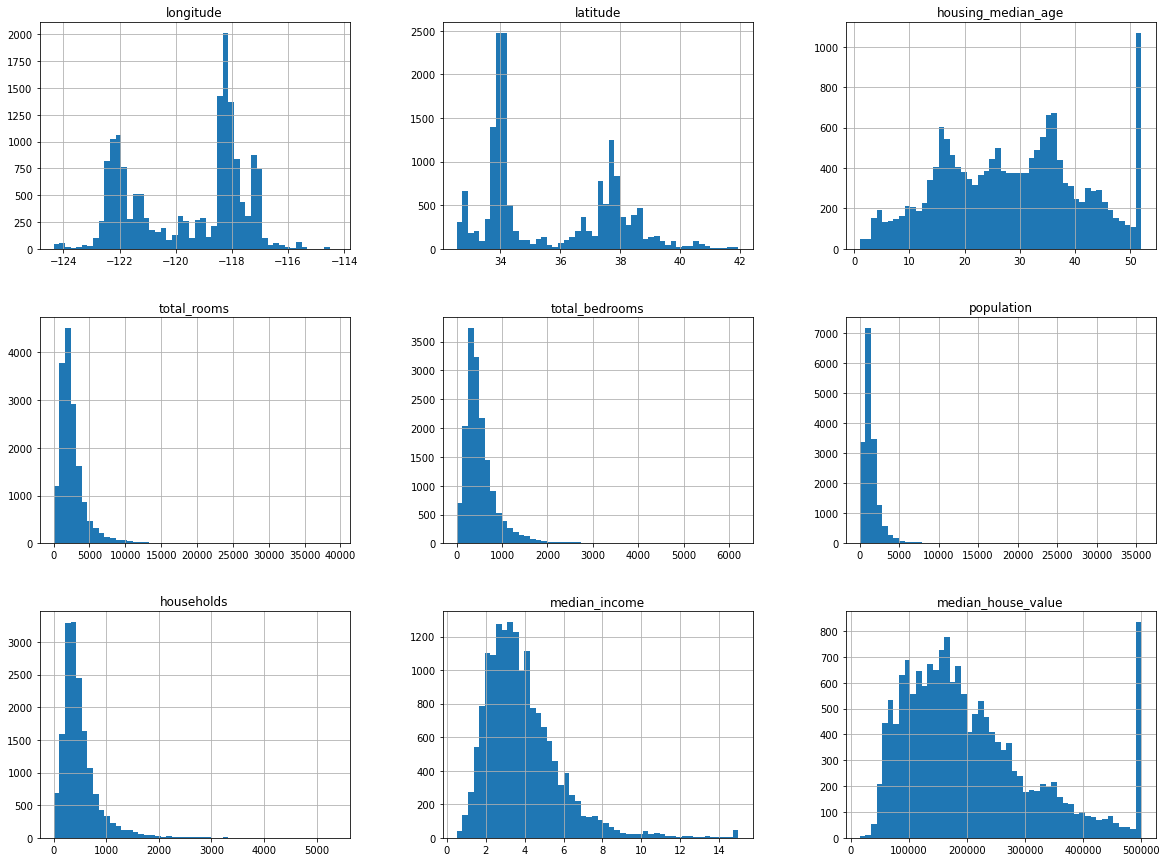

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
train.hist(bins=50, figsize=(20,15))
plt.show()

# 3. Explore the data to gain insights

Creating a plot which shows you where there is a high density of data points.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

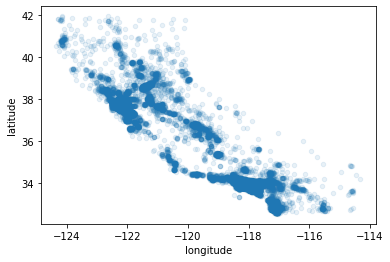

In [11]:
train.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

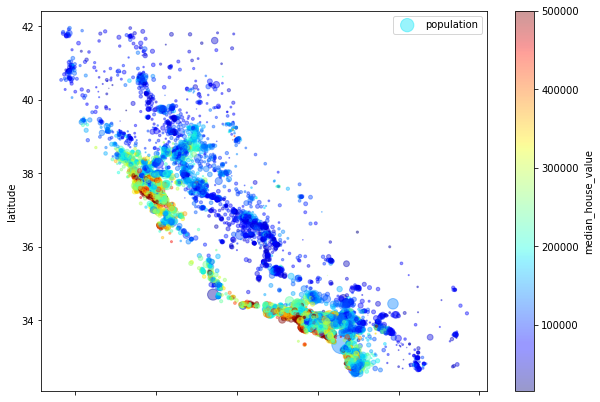

In [12]:
train.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=train["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

This represents the range in prices and the density of houses in a location.

###  Correlations

In [13]:
train_copy = train.copy()

In [14]:
corr_matrix = train.corr()

Making a correlation between median house value, to see what categories of data wich is not relevant. The correlation coefficient ranges from -1 to 1. When it is close to 1, it means that the data is closely related to what you are looking for.

In [15]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.684828
total_rooms           0.133566
housing_median_age    0.107684
households            0.065778
total_bedrooms        0.049941
population           -0.025008
longitude            -0.043824
latitude             -0.146748
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

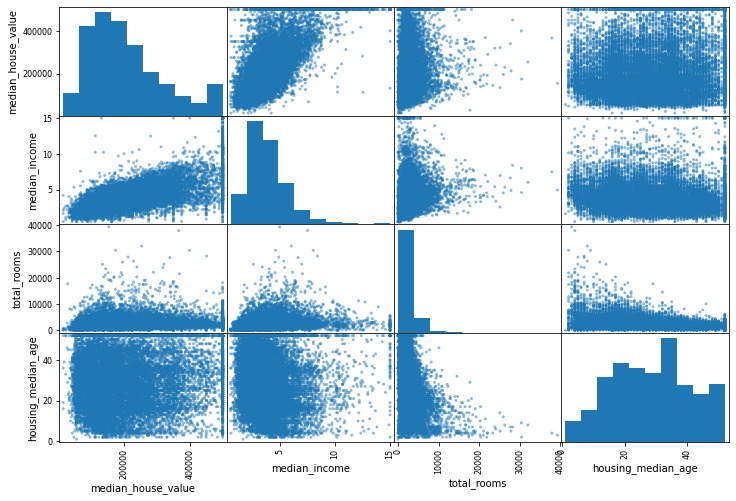

In [16]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
scatter_matrix(train[attributes], figsize=(12, 8))

After alot of trail and error, we found that bedrooms_per_room has the best correlation with median_house_value.

In [17]:
train["bedrooms_per_room"] = train["total_bedrooms"]/train["total_rooms"]
train["rooms_per_household"] = train["total_rooms"]/train["households"]

In [18]:
corr_matrix = train.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value     1.000000
median_income          0.684828
rooms_per_household    0.171947
total_rooms            0.133566
housing_median_age     0.107684
households             0.065778
total_bedrooms         0.049941
population            -0.025008
longitude             -0.043824
latitude              -0.146748
bedrooms_per_room     -0.256396
Name: median_house_value, dtype: float64

In [19]:
train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedrooms_per_room,rooms_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16344.000000,16512.000000,16512.000000,16512.000000,16512.000000,16344.000000,16512.000000
mean,-119.568763,35.630270,28.714571,2636.885841,537.999755,1425.131783,499.837936,3.871083,207262.390080,0.212969,5.413430
std,2.003747,2.137134,12.589203,2195.840228,422.944167,1126.453504,383.400473,1.909994,115838.329585,0.057613,2.271820
min,-124.350000,32.540000,1.000000,6.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.100000,0.888889
25%,-121.790000,33.930000,18.000000,1445.000000,295.000000,787.000000,279.000000,2.562500,120000.000000,0.175318,4.444444
50%,-118.490000,34.260000,29.000000,2122.500000,434.000000,1163.000000,409.000000,3.529450,180400.000000,0.203218,5.230373
75%,-118.010000,37.710000,37.000000,3137.000000,646.000000,1723.000000,603.000000,4.746450,265100.000000,0.239708,6.055028
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,1.000000,141.909091


# 4. Prepare the data to better expose the underlying data patterns to machine learning algorithms

In [20]:
train = train_copy.drop("median_house_value", axis=1)
train_labels = train_copy["median_house_value"].copy()

In [70]:
sample_incomplete_rows = train[train.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
247,-118.28,34.25,29.0,2559.0,NaN,1886.0,769.0,2.6036,<1H OCEAN
325,-117.98,33.68,24.0,4177.0,NaN,1704.0,606.0,6.2473,<1H OCEAN
605,-118.29,33.73,30.0,3161.0,NaN,1865.0,771.0,2.7139,NEAR OCEAN
636,-117.14,33.16,16.0,1660.0,NaN,733.0,214.0,5.6874,<1H OCEAN
663,-118.50,34.17,37.0,880.0,NaN,369.0,155.0,4.1429,<1H OCEAN


We have seen that there are some zero values in total_bedrooms, to clean this we set the zero values to the median value. We use SimpleImputer to replace missing data.

In [22]:
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(strategy="median")

In [23]:
train_num = train.drop("ocean_proximity", axis=1)

In [24]:
 imputer.fit(train_num)

SimpleImputer(strategy='median')

In [25]:
imputer.statistics_

array([-118.49   ,   34.26   ,   29.     , 2122.5    ,  434.     ,
       1163.     ,  409.     ,    3.52945])

In [26]:
train_num.median().values

array([-118.49   ,   34.26   ,   29.     , 2122.5    ,  434.     ,
       1163.     ,  409.     ,    3.52945])

In [27]:
X = imputer.transform(train_num)

In [28]:
train_tr = pd.DataFrame(X, columns=train_num.columns,index=train.index)
train_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
247,-118.28,34.25,29.0,2559.0,434.0,1886.0,769.0,2.6036
325,-117.98,33.68,24.0,4177.0,434.0,1704.0,606.0,6.2473
605,-118.29,33.73,30.0,3161.0,434.0,1865.0,771.0,2.7139
636,-117.14,33.16,16.0,1660.0,434.0,733.0,214.0,5.6874
663,-118.50,34.17,37.0,880.0,434.0,369.0,155.0,4.1429


In [29]:
imputer.strategy

'median'

### Handeling text and attributes

Since the algortihms prefer to work with numbers, we convert the categories from text to numbers.

In [30]:
train_cat = train[["ocean_proximity"]]
train_cat.head(10)

,ocean_proximity
0,NEAR BAY
1,INLAND
2,<1H OCEAN
3,<1H OCEAN
4,NEAR BAY
5,<1H OCEAN
6,INLAND
7,NEAR BAY
8,INLAND
9,INLAND


In [31]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
train_cat_encoded = ordinal_encoder.fit_transform(train_cat)
train_cat_encoded[:10]

array([[3.],
       [1.],
       [0.],
       [0.],
       [3.],
       [0.],
       [1.],
       [3.],
       [1.],
       [1.]])

In [32]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [33]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
train_cat_1hot = cat_encoder.fit_transform(train_cat) 
train_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [34]:
train_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [35]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### Transformer

In [36]:
from sklearn.base import BaseEstimator, TransformerMixin
col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [train.columns.get_loc(c) for c in col_names]
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room 
    def fit(self, X, y=None):
        return self # nothing else to do 
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix] 
        population_per_household = X[:, population_ix] / X[:, households_ix] 
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]


attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
train_extra_attribs = attr_adder.transform(train.values)

In [37]:
train_extra_attribs = pd.DataFrame(
    train_extra_attribs,
    columns=list(train.columns)+["rooms_per_household","bedrooms_per_room"],
    index=train.index)
train_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room
0,-122.13,37.67,40.0,1748.0,318.0,914.0,317.0,3.8676,NEAR BAY,5.514196,2.883281
1,-120.98,37.65,40.0,422.0,63.0,158.0,63.0,7.3841,INLAND,6.698413,2.507937
2,-118.37,33.87,23.0,1829.0,331.0,891.0,356.0,6.5755,<1H OCEAN,5.13764,2.502809
3,-117.89,33.9,23.0,1533.0,226.0,693.0,230.0,7.898,<1H OCEAN,6.665217,3.013043
4,-122.4,37.76,52.0,1529.0,385.0,1347.0,348.0,2.9312,NEAR BAY,4.393678,3.87069


### Transformation pipeline
As there is alot of data that needs to be executed in the right order, the pipeline will help us do that.

In [38]:
test_id = test['Id'].copy()
test.drop('Id', axis=1, inplace=True)

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])
train_num_tr = num_pipeline.fit_transform(train_num)

In [40]:
from sklearn.compose import ColumnTransformer 
num_attribs = list(train_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])
train_prepared = full_pipeline.fit_transform(train)
test_prepared = full_pipeline.transform(test)

In [41]:
train_prepared.shape

(16512, 16)

# 5. Exploring different models

We are now ready to select and train a model.

We start with regression model:

In [42]:
from sklearn.linear_model import LinearRegression 
lin_reg = LinearRegression()
lin_reg.fit(train_prepared, train_labels)

LinearRegression()

In [43]:
some_data = train.iloc[:5]
some_labels = train_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [234956.84260842 303073.513104   327746.46204573 355932.30741583
 210220.50294171]
Labels: [184000.0, 172200.0, 359900.0, 258200.0, 239100.0]


In [44]:
from sklearn.metrics import mean_squared_error
train_predictions = lin_reg.predict(train_prepared)
lin_mse = mean_squared_error(train_labels, train_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68860.85279166883

In [45]:
from sklearn.metrics import mean_absolute_error
lin_mae = mean_absolute_error(train_labels, train_predictions)
lin_mae

49761.26321393413

Since the mean and absolute error of linear regresson model on the higher end, we have decided to try another model.

### Decision tree regressor
We have decided to try decision tree regressor model.

In [46]:
from sklearn.tree import DecisionTreeRegressor 
tree_reg = DecisionTreeRegressor(random_state=69)
tree_reg.fit(train_prepared, train_labels)

DecisionTreeRegressor(random_state=69)

In [47]:
train_predictions = tree_reg.predict(train_prepared)
tree_mse = mean_squared_error(train_labels, train_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

This tree_rmse returns a 0.0 error. We can assume that this is false, due to the model having badly overfitted data.

### Evaluation
we use K-fold cross-validation from "scikit-learn" to train and evaluate the models. Here we split the training_set randomly into 10 distinct folds.

In [48]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, train_prepared, train_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [49]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(tree_rmse_scores)

Scores: [71414.89859241 71221.44356618 71701.88961754 69645.95846582
 74075.22370763 67396.49893883 72525.90513802 69201.25546816
 71142.02332929 69087.52698227]
Mean: 70741.26238061549
Standard deviation: 1831.9829925534436


In [50]:
lin_scores = cross_val_score(lin_reg, train_prepared, train_labels,
scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [70987.24786319 66375.29508519 73837.53789445 69493.59584642
 69821.05544742 69047.06162451 65908.72602507 66979.33032669
 73036.00622233 67077.50225384]
Mean: 69256.33585891138
Standard deviation: 2610.121268165482


In [51]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(train_prepared, train_labels)
train_predictions = forest_reg.predict(train_prepared)
forest_mse = mean_squared_error(train_labels, train_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18770.360217886835

In [52]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, train_prepared, train_labels, scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [52204.67886815 47430.60674899 48998.19462577 50690.86763606
 51385.46411678 49369.87822067 49367.63683793 48125.31403035
 54036.29658492 49271.19374193]
Mean: 50088.01314115552
Standard deviation: 1895.2462418044413


We see from the standard deveation from each model, that the forest_rmse is the best model, and therefore we will use it.

# 6. Fine-tune your model
since the forest_tree is the best model, we will fine-tune this using gridsearch and randomized search.

### Grid search
The grid search uses hyperparamters to find great combinations of hyperparameter values.

In [53]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, 
                           scoring='neg_mean_squared_error', 
                           return_train_score=True)
grid_search.fit(train_prepared, train_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [54]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [55]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [56]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63898.97750414909 {'max_features': 2, 'n_estimators': 3}
55072.485805709766 {'max_features': 2, 'n_estimators': 10}
52734.57610307284 {'max_features': 2, 'n_estimators': 30}
60425.266705395086 {'max_features': 4, 'n_estimators': 3}
52531.03018777006 {'max_features': 4, 'n_estimators': 10}
50344.51873501134 {'max_features': 4, 'n_estimators': 30}
58686.859392298866 {'max_features': 6, 'n_estimators': 3}
52131.76340993773 {'max_features': 6, 'n_estimators': 10}
50011.0202533914 {'max_features': 6, 'n_estimators': 30}
59419.23136757735 {'max_features': 8, 'n_estimators': 3}
52382.720908392854 {'max_features': 8, 'n_estimators': 10}
50051.91792399461 {'max_features': 8, 'n_estimators': 30}
62651.59846552674 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54056.08634530197 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60270.89004676937 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52150.031979455984 {'bootstrap': False, 'max_features': 3, 'n_estimators'

The result of finetuning the model, is that it is somewhat better than before.

### randomized search
Instead of trying out all combinations, like the Grid search, this class evaluates a given number of random combinations. It does this by selecting a random value for a hyperparameter for each iteration.

In [57]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=69)

rnd_search = RandomizedSearchCV(
                forest_reg, 
                param_distributions=param_distribs,
                n_iter=10, 
                cv=5, 
                scoring='neg_mean_squared_error', 
                random_state=69
            )

rnd_search.fit(train_prepared, train_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=69),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x126fc9940>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x126fbe8b0>},
                   random_state=69, scoring='neg_mean_squared_error')

In [58]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49187.48620073161 {'max_features': 7, 'n_estimators': 108}
49976.68141912144 {'max_features': 3, 'n_estimators': 184}
49886.332925013856 {'max_features': 5, 'n_estimators': 50}
52298.88257810456 {'max_features': 7, 'n_estimators': 10}
54820.58609427251 {'max_features': 1, 'n_estimators': 39}
54392.8819621928 {'max_features': 1, 'n_estimators': 89}
49159.87859921116 {'max_features': 5, 'n_estimators': 166}
50299.57576014932 {'max_features': 3, 'n_estimators': 76}
57165.0159728045 {'max_features': 6, 'n_estimators': 4}
54127.425256205985 {'max_features': 1, 'n_estimators': 168}


In [59]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.19707654e-02, 6.87118114e-02, 4.47013559e-02, 1.87021037e-02,
       1.77938454e-02, 1.87665223e-02, 1.67474583e-02, 3.06313003e-01,
       6.58677837e-02, 1.09926826e-01, 9.35040038e-02, 7.04984895e-03,
       1.51939539e-01, 1.45592557e-04, 3.55232684e-03, 4.30721492e-03])

In [60]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.30631300266282546, 'median_income'),
 (0.15193953871463725, 'INLAND'),
 (0.10992682556292865, 'pop_per_hhold'),
 (0.09350400377193081, 'bedrooms_per_room'),
 (0.07197076544531551, 'longitude'),
 (0.06871181141351562, 'latitude'),
 (0.06586778368202947, 'rooms_per_hhold'),
 (0.044701355930919645, 'housing_median_age'),
 (0.018766522259005693, 'population'),
 (0.01870210365224205, 'total_rooms'),
 (0.017793845360917406, 'total_bedrooms'),
 (0.01674745827712859, 'households'),
 (0.007049848946309371, '<1H OCEAN'),
 (0.0043072149219274165, 'NEAR OCEAN'),
 (0.00355232684142692, 'NEAR BAY'),
 (0.00014559255694008042, 'ISLAND')]

In [61]:
rnd_search.best_params_

{'max_features': 5, 'n_estimators': 166}

By using these parameters instead we will get a lower RMSE score, and therefore the model is more fine tuned when only using grid search

### Final Model 

Now its time to evaluate our final model on the test set. Since we got a better result fine tuning our model with finding the best parametersm, we will evaluate again with this.

In [62]:
final_model = rnd_search.best_estimator_
final_predictions_S =  final_model.predict(test_prepared)

In [63]:
len(final_predictions_S)

4128

In [64]:
final_predictions_S[:10]

array([254807.28313253, 251155.42168675,  73377.71084337, 175420.48192771,
        50161.44578313, 217890.96385542, 115287.95180723, 109000.60240964,
       140829.51807229,  80944.57831325])

In [65]:
submission = pd.DataFrame({
    'Id': test_id,
    'median_house_value': final_predictions_S
})

In [66]:
submission.head()

,Id,median_house_value
0,0,254807.283133
1,1,251155.421687
2,2,73377.710843
3,3,175420.481928
4,4,50161.445783


In [67]:
submission.to_csv('submission.csv', index=False)

# 7. present your solution
What we found out through testing, is that the median income was the best predictor of housing prices. Though we tried making a better predictor, we was not able to find one. Through the assigment we became familiar with preparing data, finding patterns and correlations and different models. 

On the first submission we got a score of 48478.03. 

The second submit, we started using the whole trainingset, and the testset. In addition we cleaned both datasets. Which scored 47611.15436 points.

In our final solution we selected the RandomForrestRegressor with the RandomSearchCV tuning, which gave us a score of 47611.15436.

# 8 Launch, monitor and maintain your system

Before we launch we need to write some monitoring code, to check our system's live performance. This needs to be checked regularly and needs to be triggered when it drops. To avoid the model "rot" , we need to make the code catch performance degradation. 

To monitor the system, we will send some random testsets, to check if the systems is still operating as they should. And the models needs to be trained on a regulary basis, by using fresh data. This process should be automated as much as possible.